# Sudden Cardiac Death Holter Database



# Contexto

Se estima que 400,000 estadounidenses, y millones más en todo el mundo, mueren repentinamente cada año. Estos eventos suelen iniciarse con una taquiarritmia ventricular sostenida, incluyendo taquicardia ventricular (monomórfica o polimórfica), aleteo ventricular o fibrilación ventricular, con un porcentaje menor relacionado con una bradiarritmia primaria. 

El síndrome de muerte cardíaca súbita puede deberse a una amplia variedad de sustratos eléctricos y mecánicos diferentes, como el infarto agudo de miocardio, la enfermedad coronaria crónica con infartos previos, las miocardiopatías, la miocarditis, la enfermedad valvular cardíaca, la displasia ventricular derecha, el síndrome de QT largo (adquirido o congénito), la preexcitación de Wolff-Parkinson-White, el síndrome de Brugada, la toxicidad por drogas (por ejemplo, los efectos proarrítmicos de fármacos cardioactivos; epinefrina, cocaína y estimulantes relacionados), y otros. Además, algunos individuos no presentan predisposición eléctrica o mecánica demostrable.


# Sobre los datos

23 grabaciones Holter completas, recopiladas originalmente por Scott Greenwald en el MIT, que incluyen 18 pacientes con ritmo sinusal subyacente, uno con marcapasos continuo y cuatro con fibrilación auricular, todos con taquiarritmia ventricular sostenida y la mayoría con paro cardíaco. Aunque se obtuvieron en hospitales de Boston en los años 80, la información del paciente es limitada o inexistente, y puede que los casos no representen episodios espontáneos de muerte súbita. 

# 01 Obtain

In [11]:
# import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
# import loadmat from scipy.io

from scipy.io import loadmat

In [12]:
# load 12726m.info. this file is a plain text file

info = open('30m.info').read()

# print the content of the info file

print(info)

Source: record sddb/30  Start: [12:00:00.000]
val has 1 row (signal) and 2500 columns (samples/signal)
Duration:     0:10
Sampling frequency: 250 Hz  Sampling interval: 0.004 sec
Row	Signal	Gain	Base	Units
1	ECG	800	0	mV

To convert from raw units to the physical units shown
above, call the 'rdmat.m' function from the wfdb-matlab
toolbox: https://physionet.org/physiotools/matlab/wfdb-app-matlab/



## Observaciones

- La frecuencia de muestreo es 250 Hz
- Se tiene 10 segundos de señal
- Se tiene 2500 muestras
- La ganancia es de 800
- La base de tiempo es 0

In [13]:
# load 12726m.mat 

data = loadmat('30m.mat')

## imprimir los campos de data

#print(data.keys())

ecg = data['val']

print(ecg)

[[ 51  58  67 ... -53 -43 -34]]


# 02 Data transformation

- Normalizar la señal ECG para que quede entre -1 y 1
- Transformar el objeto ECG a un arreglo 1D

In [14]:
base=0
ganancia=800
ecg=(ecg-base)/ganancia # normalizar la señal ecg para que quede entre -1 y 1

print(ecg)

[[ 0.06375  0.0725   0.08375 ... -0.06625 -0.05375 -0.0425 ]]


In [15]:
# tranform the ecg signal to a 1D numpy array

ecg = ecg.flatten()

print(ecg)

[ 0.06375  0.0725   0.08375 ... -0.06625 -0.05375 -0.0425 ]


# 03 Data Exploration

In [16]:
# summary statistics for ecg

print('mean:', np.mean(ecg))
print('std:', np.std(ecg))
print('min:', np.min(ecg))
print('max:', np.max(ecg))

print('numero de muestras :',ecg.size)

mean: 0.000287499999999995
std: 0.23973875462417416
min: -0.7425
max: 0.86375
numero de muestras : 2500


# 04 Visualization

In [17]:
# crear un vector de tiempo para la señal ecg
# vector de tiempo tiene la misma cantidad de muestras que la señal ecg
fs = 250 # frecuencia de muestreo
t = np.arange(0, ecg.size/fs, 1/fs) # vector de tiempo
print(t)
print(t.size)

[0.000e+00 4.000e-03 8.000e-03 ... 9.988e+00 9.992e+00 9.996e+00]
2500


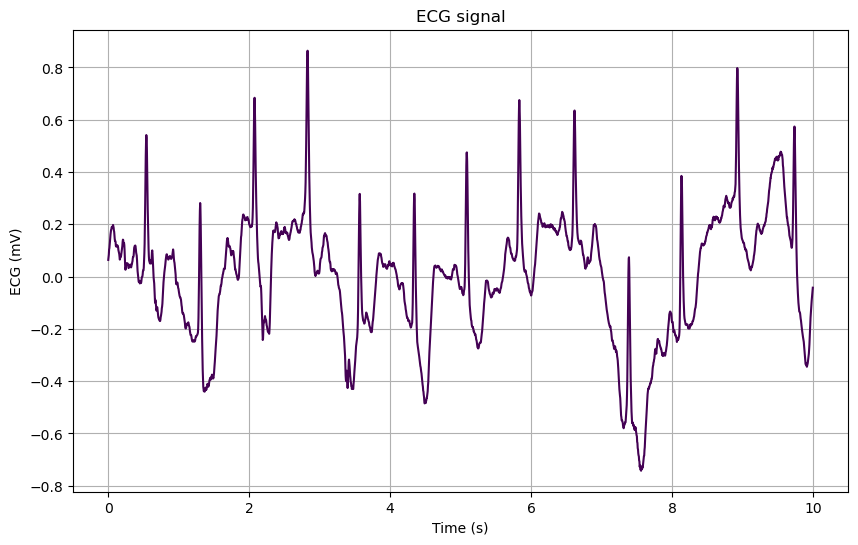

In [18]:
# plot the ecg signal

# change the color of the plot
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.viridis(np.linspace(0, 1, 10)))

# make a bigger plot 
plt.figure(figsize=(10, 6))


plt.plot(t, ecg)
plt.xlabel('Time (s)')
plt.ylabel('ECG (mV)')
plt.title('ECG signal')
plt.grid()
plt.show()